In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plastic-waste-generation-worldwide/plastic-waste-generation.csv


In [2]:
# Load the data set into 'waste' data frame

waste = pd.read_csv('/kaggle/input/plastic-waste-generation-worldwide/plastic-waste-generation.csv')

# Load the first 10 data of the data frame
waste.head(10)

,Entity,Year,"Plastic waste generation (tonnes, total)"
0,Albania,2010,73364
1,Algeria,2010,1898343
2,Angola,2010,528843
3,Antigua and Barbuda,2010,22804
4,Argentina,2010,2753550
5,Aruba,2010,9352
6,Australia,2010,900658
7,Bahamas,2010,51364
8,Bahrain,2010,59785
9,Bangladesh,2010,1888170


In [3]:
# Renaming Columns for better readability

waste = waste.rename(columns = {'Plastic waste generation (tonnes, total)': 'Waste in Tonnes', \
                                'Entity': 'Country'}).copy()
    

In [4]:
# Check the data set values, and data type
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          168 non-null    object
 1   Year             168 non-null    int64 
 2   Waste in Tonnes  168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [5]:
# Droping year as the data is exlcusively are in the same year, 2010

waste = waste.drop('Year', axis = 1)

In [6]:
# Checking for null values
waste.isna().sum()

Country            0
Waste in Tonnes    0
dtype: int64

In [7]:
# Making a subset of top 10 countries 

top_10 = waste.sort_values(by = 'Waste in Tonnes', ascending = False).reset_index(drop = True).head(10)
top_10

,Country,Waste in Tonnes
0,China,59079741
1,United States,37825550
2,Germany,14476561
3,Brazil,11852055
4,Japan,7993489
5,Pakistan,6412210
6,Nigeria,5961750
7,Russia,5839685
8,Turkey,5596657
9,Egypt,5464471


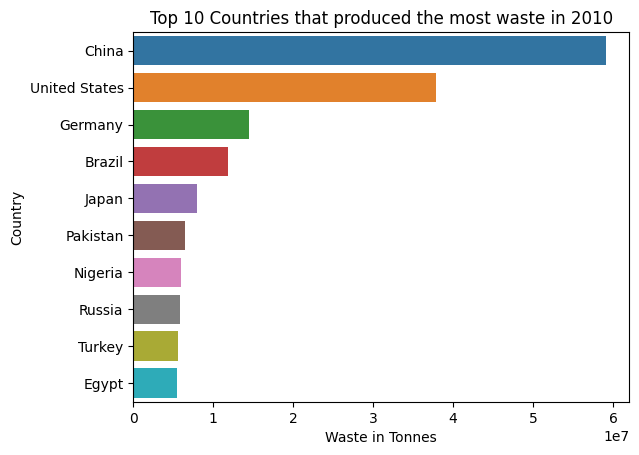

In [8]:
## What are the top 10 countries that produced the most wast in 2010? 

sns.barplot(top_10, y = 'Country', x = 'Waste in Tonnes', orient = 'h')
plt.title('Top 10 Countries that produced the most waste in 2010')
plt.show()